In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import configparser

from datetime import datetime



# import sys
# sys.path.append(".")
# from autoutils import datautils
# from autoutils import dbutils
# from autoutils import metricutils
# from autoutils import plotutils
import datautils
import dbutils
import metricutils
import plotutils

from imp import reload

reload(datautils)
reload(dbutils)
reload(metricutils)
reload(plotutils)

<module 'plotutils' from 'D:\\study\\00_notebook\\autoutils\\plotutils.py'>

# 功能说明
- plotutils.py：画图  
- dbutils.py：数据库连接
- metricutils.py：模型评估
- datautils.py：特征工程

# 加载数据

In [2]:
data = pd.read_csv('./data/CF.csv')
data = data[data.commid == 'CF1609']
# data = data.loc[:, ['trade_date', 'vol', 'hold']]
# data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y-%m-%d')
# data.set_index(['trade_date'], inplace=True)


x = [datetime.strptime(d, '%Y-%m-%d').date() for d in data.trade_date ]  # 时间类型：data.trade_date.dt.strftime('%Y-%m-%d')



data.head()

,trade_date,commid,open_price,high_price,low_price,close_price,clear_price,vol,hold
1043,2015-9-17,CF1609,12755,12760,12600,12725,12685,1310,1010
1049,2015-9-18,CF1609,12705,12750,12700,12705,12730,414,1156
1055,2015-9-21,CF1609,12685,12720,12590,12645,12620,796,1606
1061,2015-9-22,CF1609,12630,12670,12570,12595,12605,1598,2910
1067,2015-9-23,CF1609,12600,12690,12600,12680,12660,1254,3764


# plotutils

## 定义参数

In [3]:
'''
字体查询: fc-list :lang=zh 
'''

class PlotConfig:
    font_path='./fonts/simhei.ttf'
    y1_c='#EE7E2D'
    y2_c='#4273C5'
    fig_x=25
    fig_y=8
    lw=2
    tick_len=30
    tick_size=25
    label_size=25
    legend_size=25
    title_size=35


## plot_one
x：时间  
y：序列

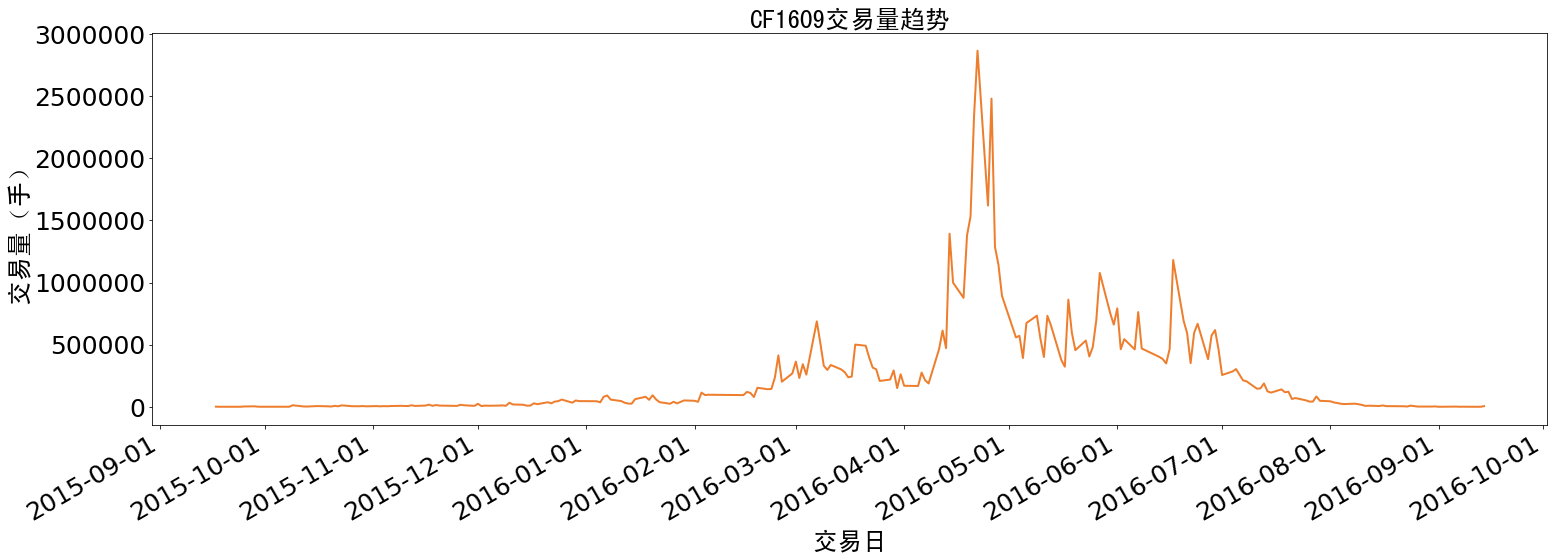

In [4]:
plotutils.plot_one(x, data.vol, '交易日', '交易量（手）', 'CF1609交易量趋势')

## plot_two

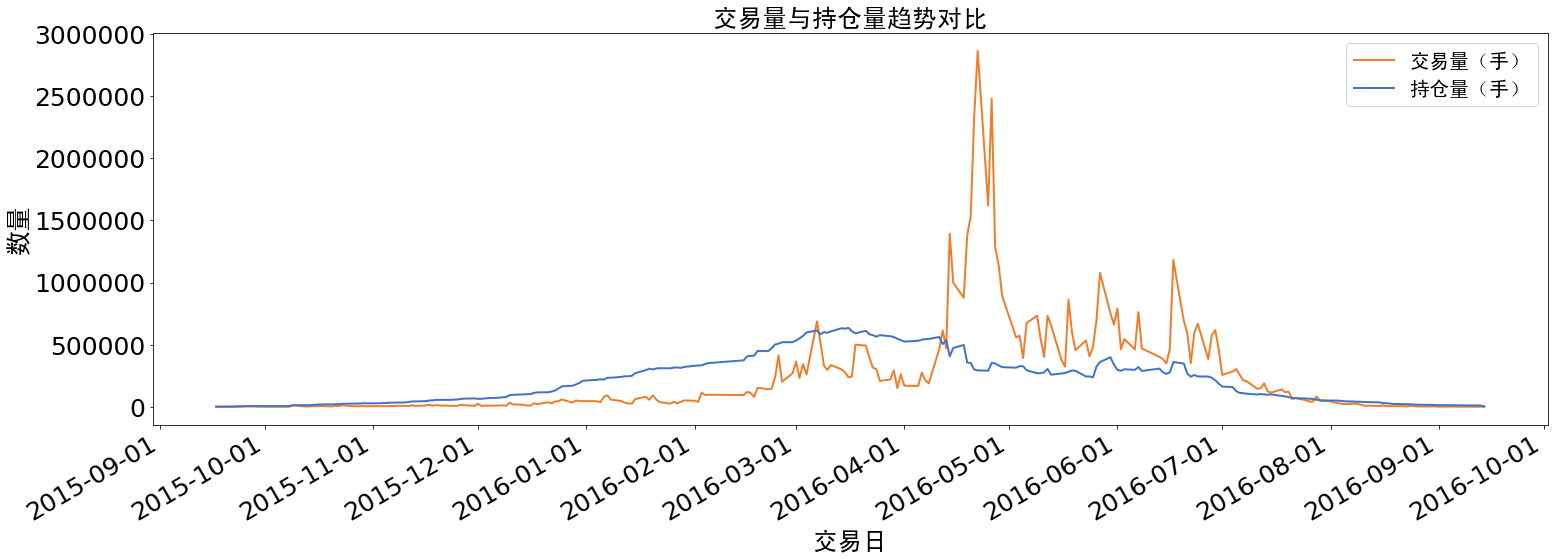

In [5]:
plotutils.plot_two(x, data.vol, data.hold, '交易日','数量','交易量（手）', '持仓量（手）','交易量与持仓量趋势对比')


## plot_vs

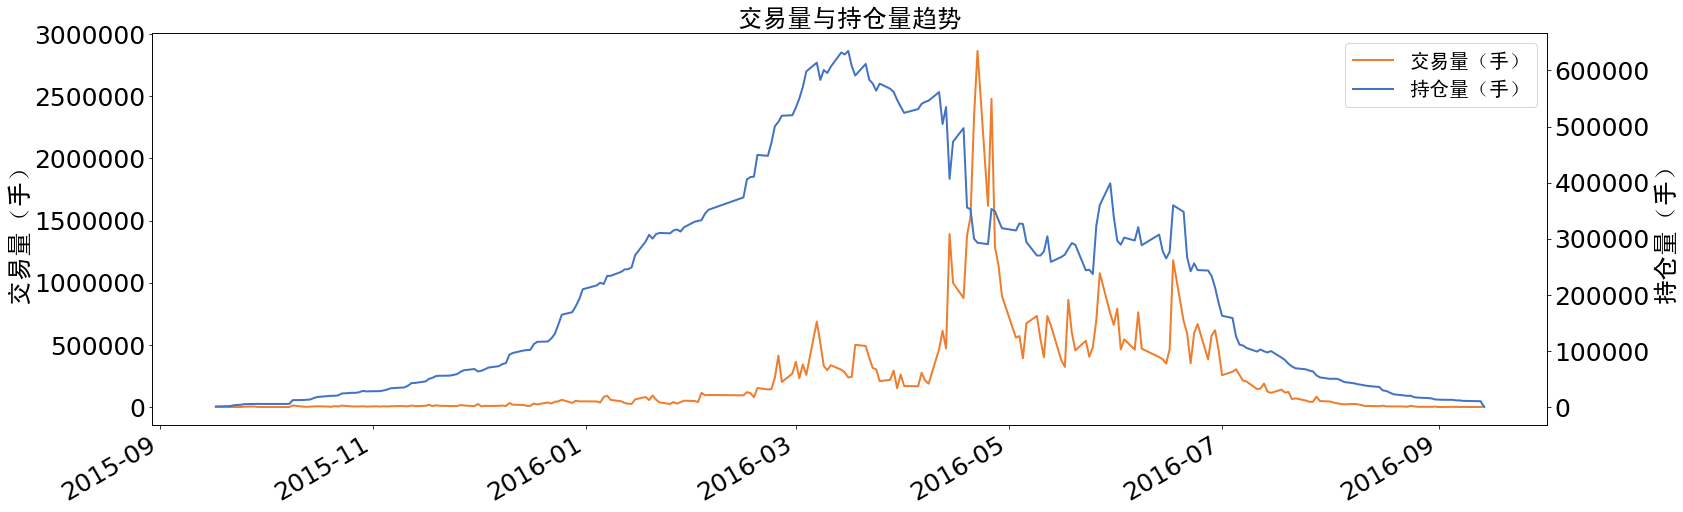

In [6]:
plotutils.plot_vs(x, data.vol.values, data.hold.values, '交易量（手）', '持仓量（手）','交易量与持仓量趋势')


## plot_subplots

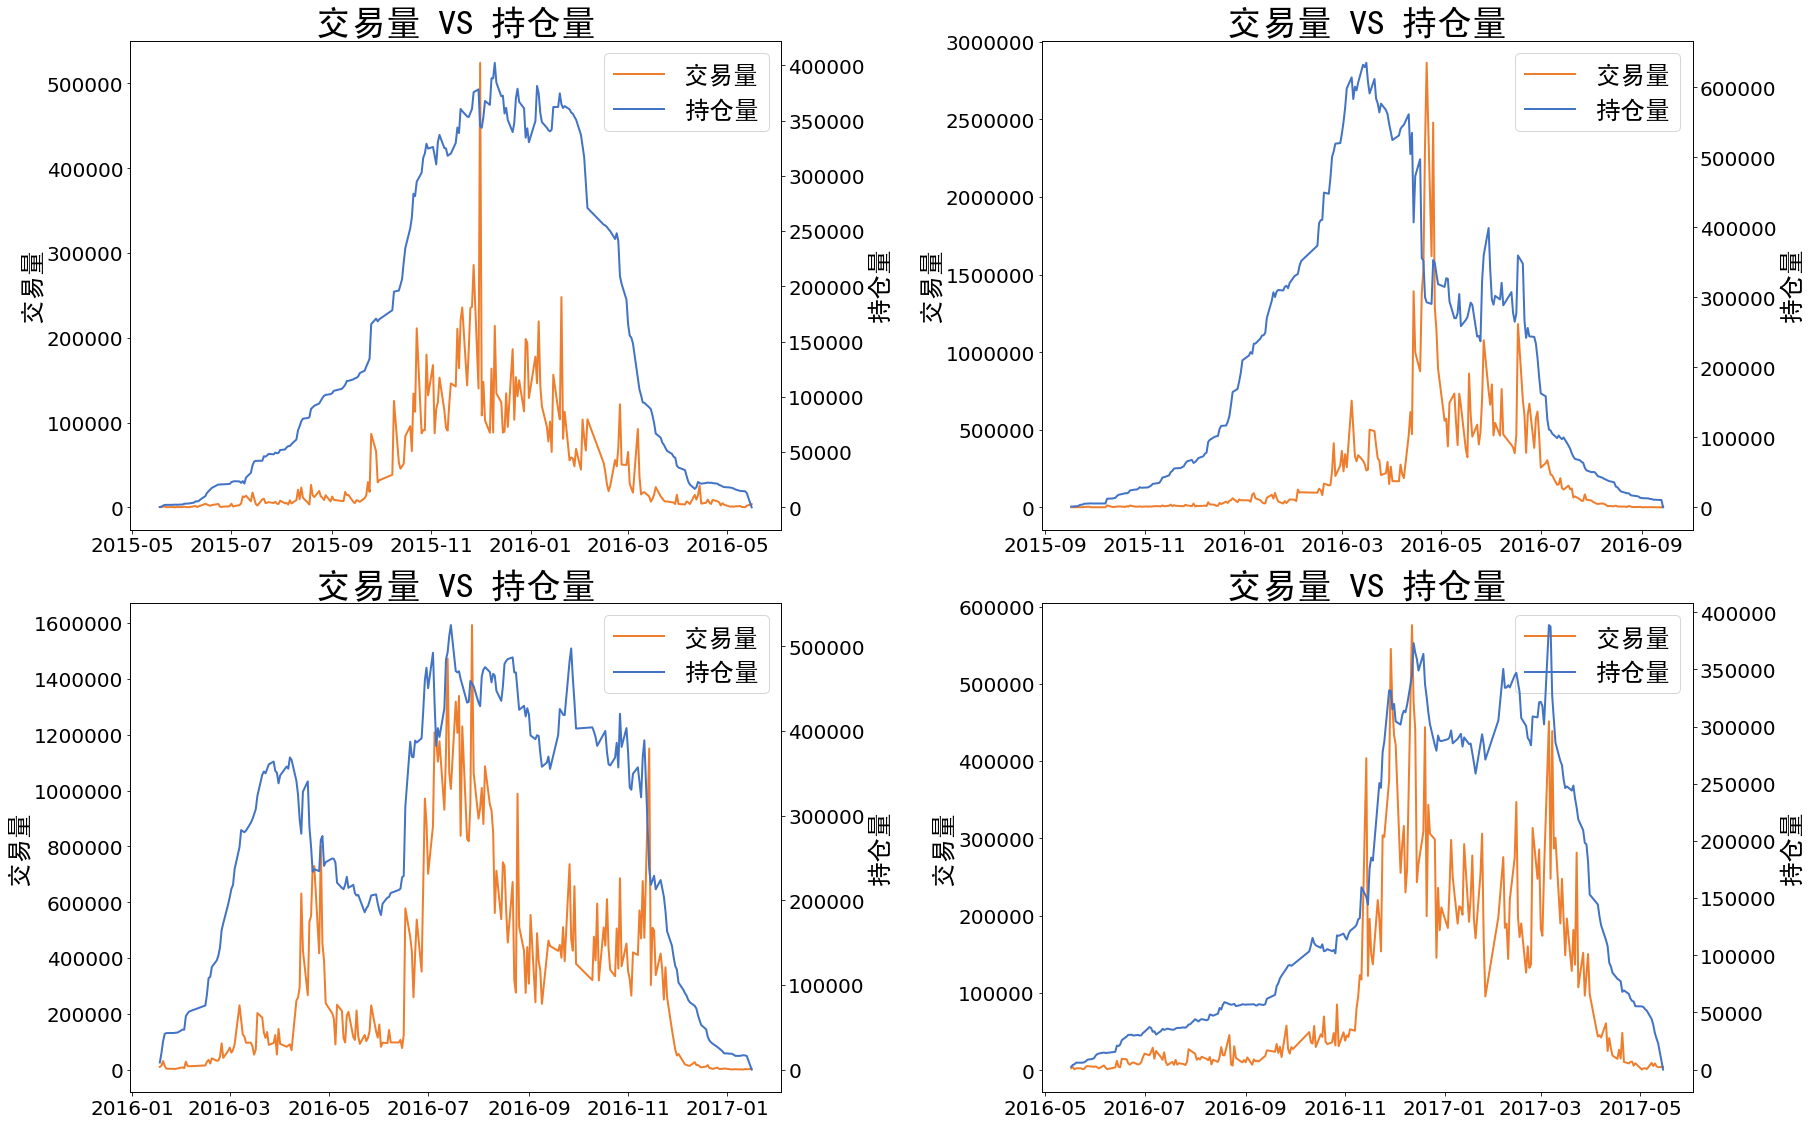

In [7]:
class PC1(PlotConfig):
    def __init__(self):
        super().__init__()
        

PC1.fig_x = 28
PC1.fig_y = 20
PC1.tick_size = 20

df = pd.read_csv('./data/CF.csv')
plotutils.plot_subplots(data=df, 
              id_list=['CF1605','CF1609','CF1701','CF1705']  ,
              x_column='trade_date', 
              y1_column='vol', 
              y2_column='hold', 
              y1_label='交易量', 
              y2_label='持仓量', 
              title='交易量 VS 持仓量', 
              x_num=2, 
              y_num=2,
              ptConfig=PC1
              )

## 坐标系

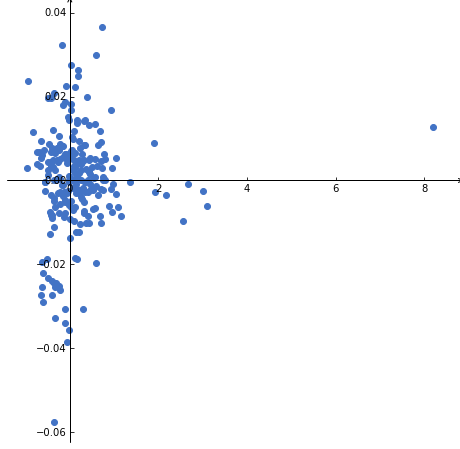

In [8]:
plotutils.plot_descartes((data.vol.shift(1)-data.vol)/data.vol, (data.clear_price.shift(1)-data.clear_price)/data.clear_price)


# dbutils
需要先修改 ./conf/dbutils.conf 配置文件

In [3]:
print('Impyla连接测试.')
sql = "SELECT sysdate from system.dual"
dbtest = dbutils.execSqlImpyla(sql)
dbtest

Impyla连接测试.


,_c0
0,2022-01-27


In [4]:
print('Pyhive连接测试.')
sql = "SELECT sysdate from system.dual"
dbutils.execSqlPyhive(sql)

Pyhive连接测试.


,_c0
0,2022-01-27 15:20:32


In [ ]:
print('Pyodbc连接测试.')
sql = "SELECT sysdate from system.dual"
dbutils.execSqlPyodc(sql)

# metricutils

In [5]:
metricutils.test()

hello world


# datautils